In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm

## Factor 1: Average Work Time per Week.

In [2]:
if "df" not in locals():
    df =  pd.read_csv('../Datasets/project_dataset.csv')

# =================== Factor 1) Average Work Time per Week ====================

# Division of the data into two groups;  below and above the average
average_time = df['Mean usual hours (Men+Women)'].mean()                      
below_average = df[df['Mean usual hours (Men+Women)'] < average_time]['deaths']
above_average = df[df['Mean usual hours (Men+Women)'] >= average_time]['deaths']
df['Group_time'] = df['Mean usual hours (Men+Women)'].apply(lambda x: 0 if x < average_time else 1)        # 0 is the group below the median

# Matrix creation (without interaction term)
x = df['Group_time']
x = sm.add_constant(x)
y = df['deaths']

# Model regression
model_meanTime = sm.OLS(y, x)
results01 = model_meanTime.fit()
params01 = results01.params
print(results01.summary())

# Comprobation with the Two-sample t-test function
t_stat, p_value = ttest_ind(below_average, above_average)
alpha = 0.05                                                                    # significance level

# Two-sample t-test function's result
if p_value < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"
print(f"The t-statistic is {t_stat:.2f} and the p-value is {p_value:.4f}. The impact of higher work time on COVID deaths is {result}.")

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08628
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.769
Time:                        07:12:05   Log-Likelihood:                -8309.4
No. Observations:                 599   AIC:                         1.662e+04
Df Residuals:                     597   BIC:                         1.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         3.6e+04   1.43e+04      2.526      0.0

## FACTOR 2: Workers in food and agriculture-related sectors

In [3]:
# Creation of the column "Percentage" that compares the workers in the selected sector with the total workers in 2020
df['Percentage'] = df['2020 16+ civilian employed in: Agriculture, forestry, fishing, and hunting)'] / df['Total 2020 16+ civilian employed'] * 100

# Division of the data into two groups;  below and above the average
average_workers = df['Percentage'].mean()                      
below_average02 = df[df['Percentage'] < average_workers]['deaths']
above_average02 = df[df['Percentage'] >= average_workers]['deaths']
df['Group_work'] = df['Percentage'].apply(lambda x: 0 if x < average_workers else 1)     # 0 is the group below the median

# Matrix creation (without interaction term)
x = df['Group_work']
x = sm.add_constant(x)
y = df['deaths']

# Model regression
model_industry = sm.OLS(y, x)
results02 = model_industry.fit()
params02 = results02.params
print(results02.summary())

# Comprobation with the Two-sample t-test function
t_stat, p_value = ttest_ind(below_average02, above_average02)
alpha = 0.05                                                                    # significance level

# Two-sample t-test function's result
if p_value < alpha:
    result = "statistically significant"
else:
    result = "not statistically significant"

print(f"The t-statistic is {t_stat:.2f} and the p-value is {p_value:.4f}. The impact of work in Agriculture-related sectors on COVID deaths is {result}.")

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.244
Date:                Thu, 02 Nov 2023   Prob (F-statistic):             0.0722
Time:                        07:12:10   Log-Likelihood:                -8307.8
No. Observations:                 599   AIC:                         1.662e+04
Df Residuals:                     597   BIC:                         1.663e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.54e+04   1.25e+04      3.642      0.0

## 3. Interaction Effect Analysis

In [4]:

# ===================== Interaction Effect Analysis ===========================

# Matrix creation (with interaction term)
df['interaction'] = df['Mean usual hours (Men+Women)'] * df['Percentage']          
X = df[['Mean usual hours (Men+Women)', 'Percentage', 'interaction']]
y = df['deaths']

# Model Regression
X = sm.add_constant(X)                                                          # Add a constant (intercept) to the model
model_binary = sm.OLS(y, X)
results03 = model_binary.fit()
params03 = results03.params
print(results03.summary())

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.695
Date:                Thu, 02 Nov 2023   Prob (F-statistic):              0.167
Time:                        07:12:10   Log-Likelihood:                -8306.9
No. Observations:                 599   AIC:                         1.662e+04
Df Residuals:                     595   BIC:                         1.664e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Is the model regression good?

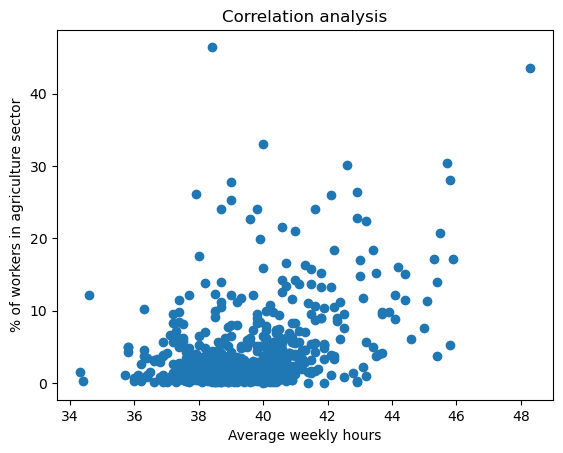

F-statistic: 1.695
P-value associated with F-statistic: 0.167


In [10]:
fig10, axis10 = plt.subplots()
axis10.scatter(df['Mean usual hours (Men+Women)'], df['Percentage'])
axis10.set_xlabel("Average weekly hours")
axis10.set_ylabel("% of workers in agriculture sector")
axis10.set_title("Correlation analysis")
plt.show()

# Get the F-statistic and its associated p-value
f_statistic = results03.fvalue
p_value = results03.f_pvalue

print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value associated with F-statistic: {p_value:.3f}")

## 4. GRAPHICS SETTINGS

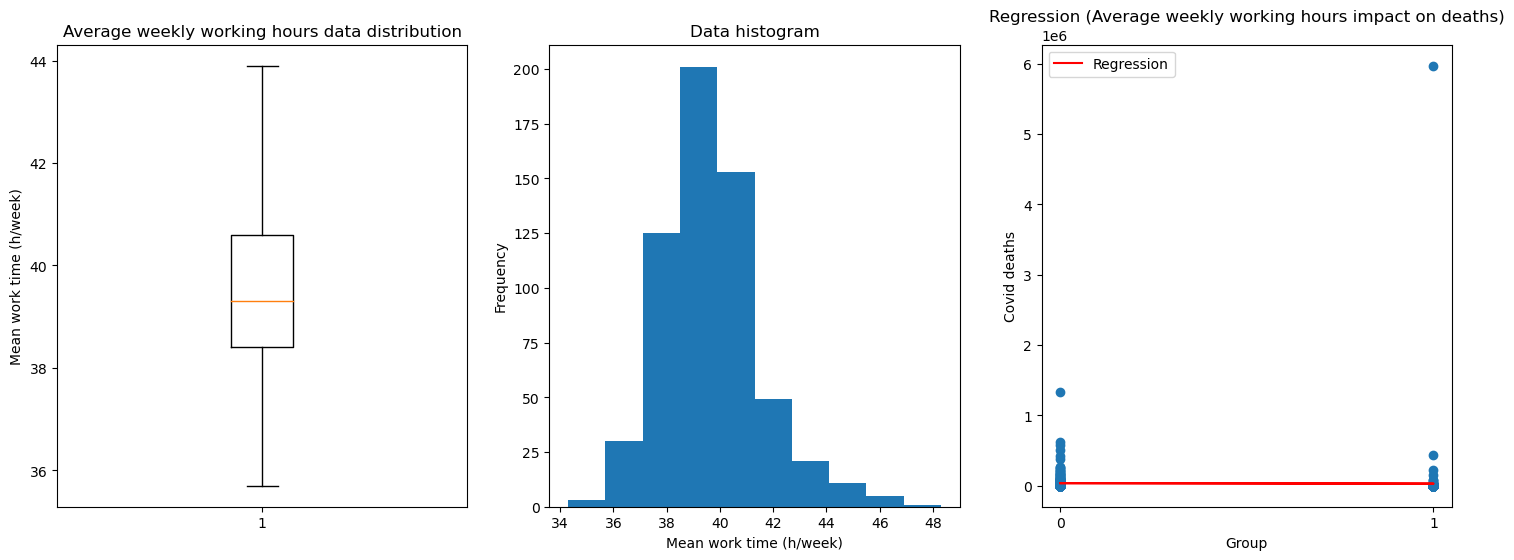

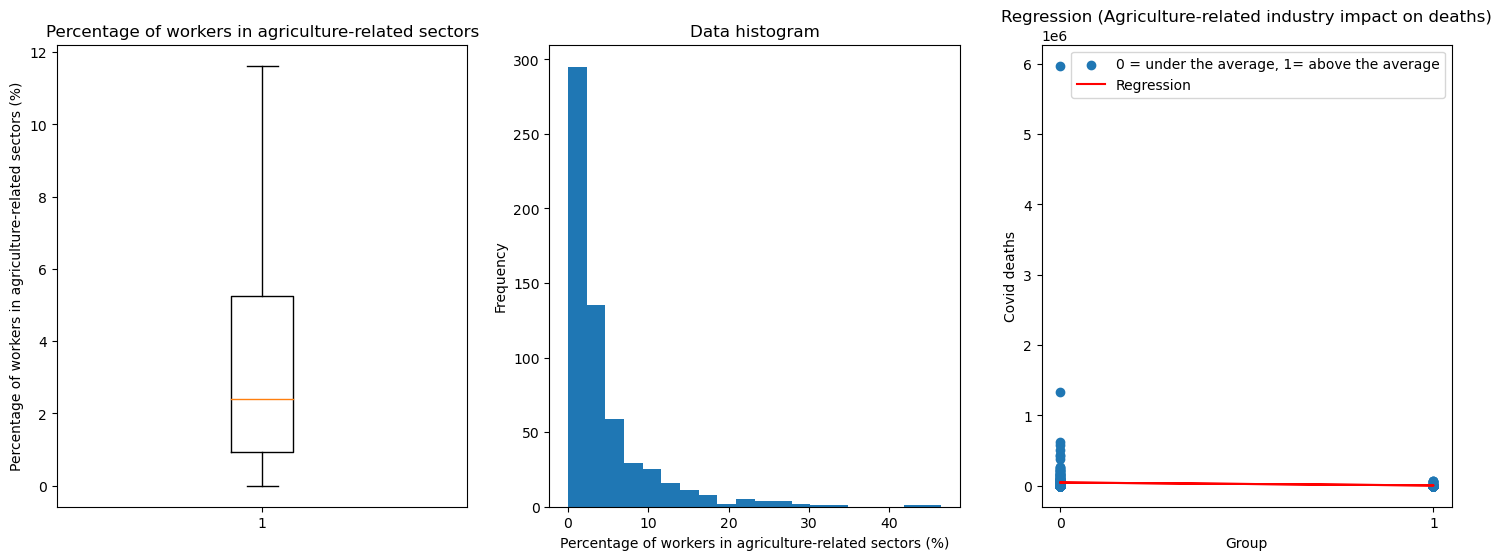

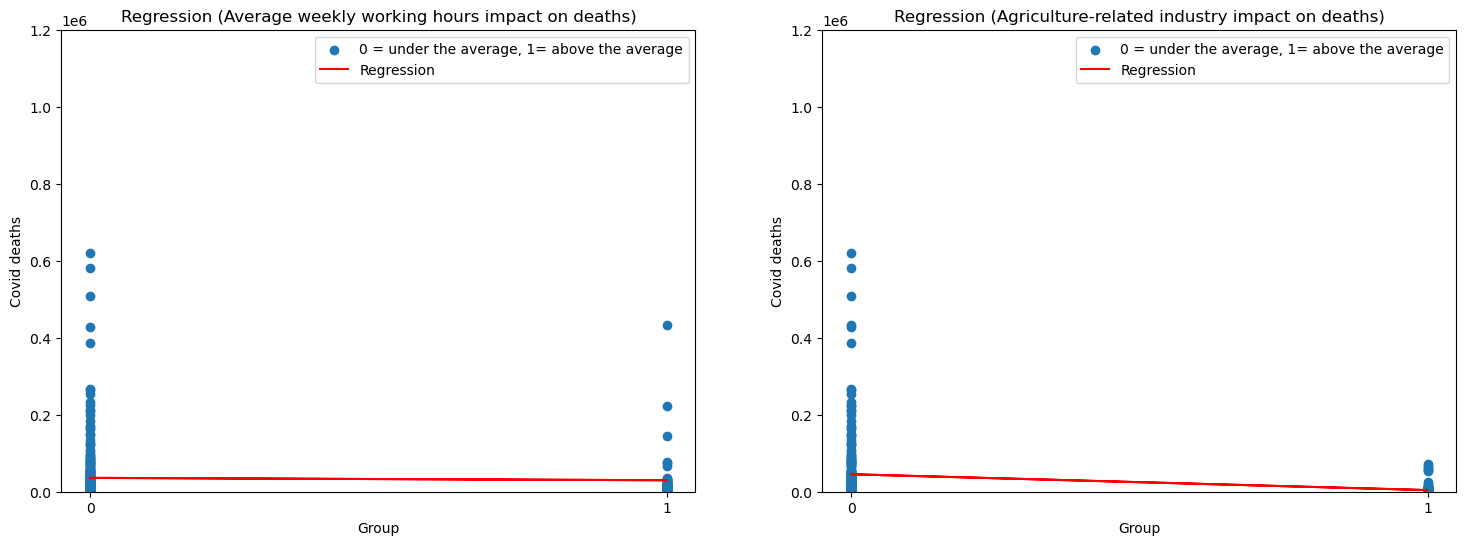

In [6]:
# ================== GRAPHIC CONFIGURATION =====================================

weekly_hours = df['Mean usual hours (Men+Women)']
workers = df['2020 16+ civilian employed in: Agriculture, forestry, fishing, and hunting)']

# =============================================================================

# Creation of a figure with multiple subplots slots 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot graphic, factor 1 data
axes[0].boxplot(weekly_hours, showfliers=False)
axes[0].set_ylabel('Mean work time (h/week)')
axes[0].set_title('Average weekly working hours data distribution')

# Histogram graphic, factor 1 data
axes[1].hist(weekly_hours )
axes[1].set_ylabel('Frequency')
axes[1].set_title('Data histogram')
axes[1].set_xlabel('Mean work time (h/week)')

# Scatter graphic and regression, factor 1
axes[2].scatter(df['Group_time'], df['deaths'])
axes[2].plot(df['Group_time'], params01[1]*df['Group_time']+params01[0], label="Regression", color="red")
axes[2].set_ylabel('Covid deaths')
axes[2].set_xlabel('Group')
axes[2].set_xticks([0, 1])
axes[2].set_title('Regression (Average weekly working hours impact on deaths)')
axes[2].legend()

# =============================================================================

# Creation of a figure with multiple subplots slots 
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot graphic, factor 2 data
axes2[0].boxplot(df['Percentage'], showfliers=False)
axes2[0].set_ylabel('Percentage of workers in agriculture-related sectors (%)')
axes2[0].set_title('Percentage of workers in agriculture-related sectors')

# Histogram graphic, factor 2 data
axes2[1].hist(df['Percentage'], bins=20)
axes2[1].set_ylabel('Frequency')
axes2[1].set_title('Data histogram')
axes2[1].set_xlabel('Percentage of workers in agriculture-related sectors (%)')

# Scatter graphic and regression, factor 2
axes2[2].scatter(df['Group_work'], df['deaths'], label='0 = under the average, 1= above the average')
axes2[2].plot(df['Group_work'], params02[1]*df['Group_work']+params02[0],label="Regression", color="red")
axes2[2].set_ylabel('Covid deaths')
axes2[2].set_xlabel('Group')
axes2[2].set_xticks([0, 1])
axes2[2].set_title('Regression (Agriculture-related industry impact on deaths)')
axes2[2].legend()

# ==============================================================================

# Creation of a figure with multiple subplots slots 
fig3, axes3 = plt.subplots(1,2, figsize = (18,6))

# Scatter graphic and regression, factor 1 (expanded)
axes3[0].scatter(df['Group_time'], df['deaths'], label='0 = under the average, 1= above the average')
axes3[0].plot(df['Group_time'], params01[1]*df['Group_time']+params01[0], label="Regression", color="red")
axes3[0].set_ylim(0, 1.2e6)
axes3[0].set_ylabel('Covid deaths')
axes3[0].set_xticks([0, 1])
axes3[0].set_xlabel('Group')
axes3[0].set_title('Regression (Average weekly working hours impact on deaths)')
axes3[0].legend()

# Scatter graphic and regression, factor 2 (expanded)
axes3[1].scatter(df['Group_work'], df['deaths'], label='0 = under the average, 1= above the average')
axes3[1].plot(df['Group_work'], params02[1]*df['Group_work']+params02[0],label="Regression", color="red")
axes3[1].set_ylabel('Covid deaths')
axes3[1].set_ylim(0, 1.2e6)
axes3[1].set_xticks([0, 1])
axes3[1].set_xlabel('Group')
axes3[1].set_title('Regression (Agriculture-related industry impact on deaths)')
axes3[1].legend()

plt.show()

## 5. Plots storage:

' Message of the coder:  GRACIAS POR VER!'

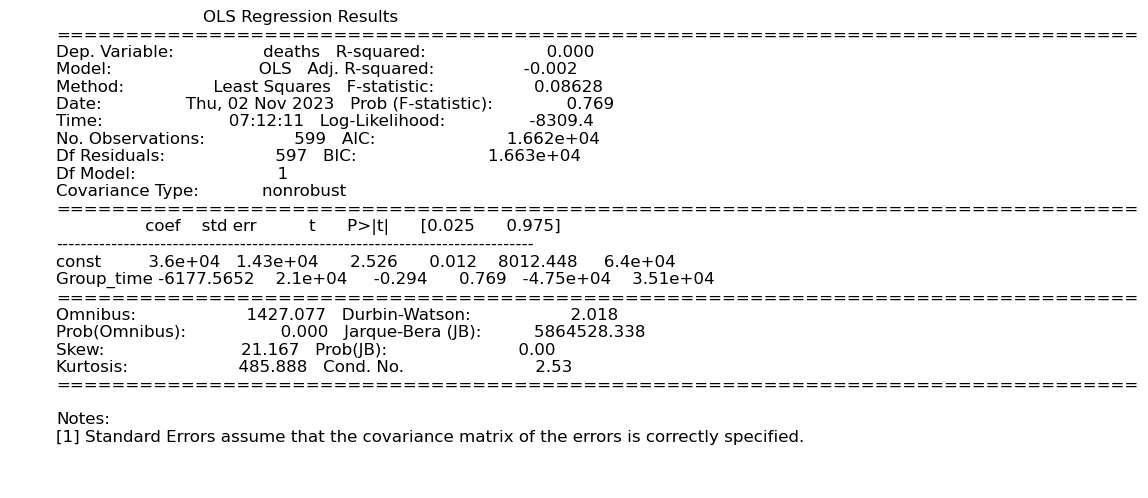

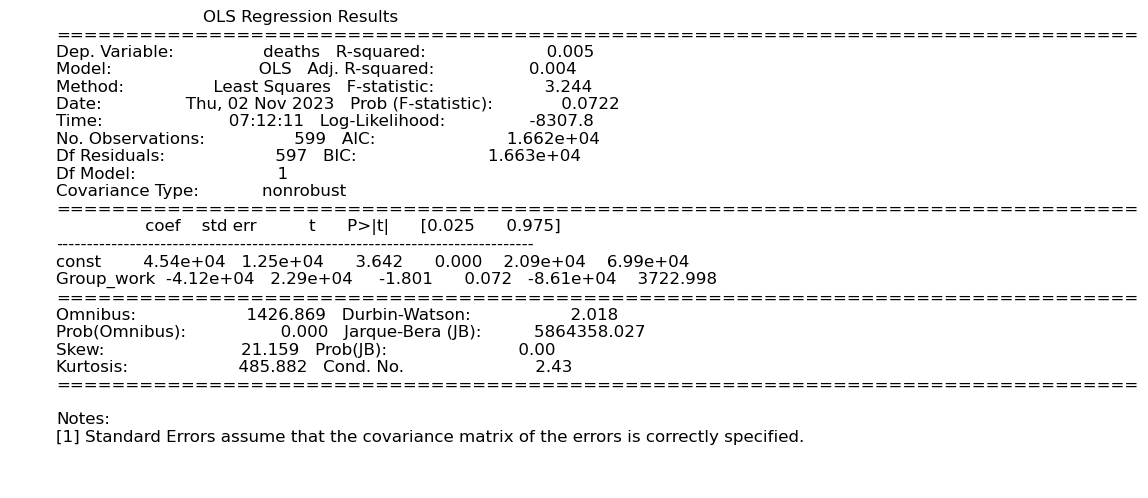

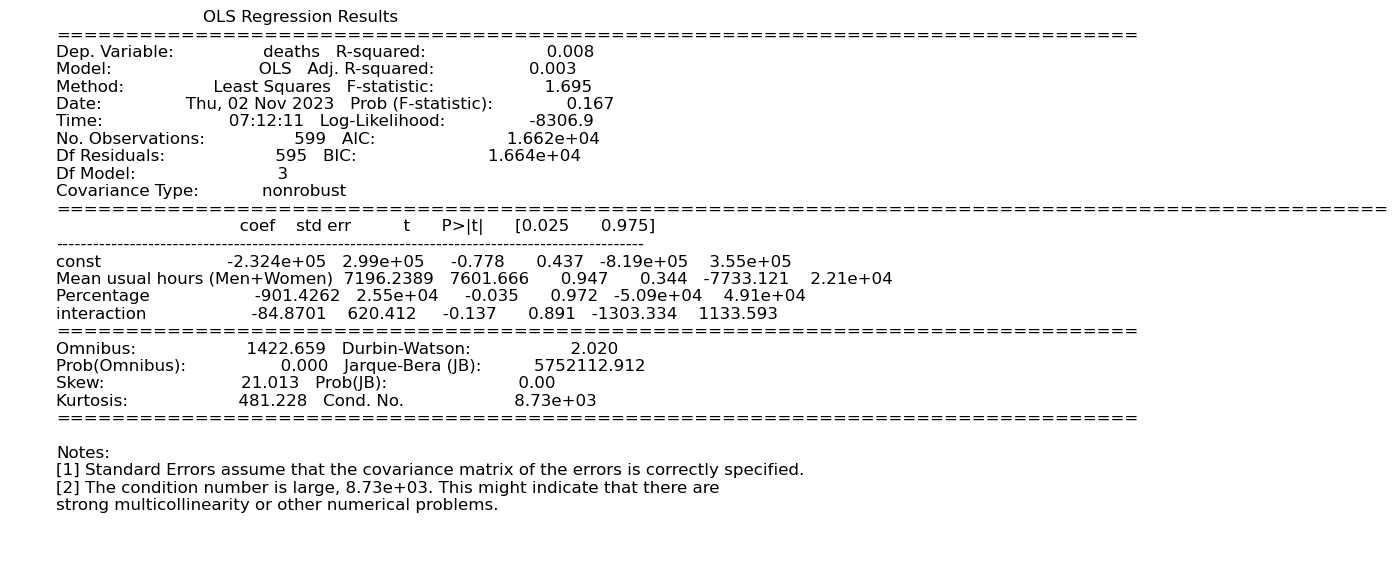

In [7]:
# Create a figure for the summary plot
fig4, ax4 = plt.subplots(figsize=(6, 6)); ax4.axis('off')
fig5, ax5 = plt.subplots(figsize=(6, 6)); ax5.axis('off')  
fig6, ax6 = plt.subplots(figsize=(6, 6)); ax6.axis('off')

ax4.text(0.1, 0.1, results01.summary(), fontsize=12)
ax5.text(0.1, 0.1, results02.summary(), fontsize=12)
ax6.text(0.1, 0.1, results03.summary(), fontsize=12)

fig.savefig('../Graphics and Results Storage/ factor1_results.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
fig2.savefig('../Graphics and Results Storage/ factor2_results.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
fig3.savefig('../Graphics and Results Storage/ f1+f2_regression_plot.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

fig4.savefig('../Graphics and Results Storage/ factor1_regression_summary.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
fig5.savefig('../Graphics and Results Storage/ factor2_regression_summary.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
fig6.savefig('../Graphics and Results Storage/ binary_regression_summary.png', bbox_inches='tight', pad_inches=0.1, dpi=300)


""" Message of the coder:  GRACIAS POR VER!"""